# Peyrache et al (2015) Dataset Tutorial 

*Author: Dhruv Mehrotra*


This notebook demonstrates how we use Pynapple on various publicly available datasets in systems neuroscience to streamline analysis. In this notebook, we will examine the dataset from Peyrache et al (2015), which was used to generate Figure 4a in the publication. 

The NWB file for the example used here is provided in this repository. The entire dataset can be downloaded  <a href="https://crcns.org/data-sets/thalamus/th-1" target="_blank">here</a>. 

See the <a href="https://peyrachelab.github.io/pynapple/#installation" target="_blank">documentation</a> of Pynapple for instructions on installing the package.

First, import the necessary libraries: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pynapple as nap
import scipy.ndimage

***

## Step-by-step tutorial

### Head-direction Tuning Curves

The first step is to load the data and other relevant variables of interest

In [3]:
data_directory = '/media/DataDhruv/Recordings/Mouse32/Mouse32-140822' #Path to your data 

data = nap.load_session(data_directory, 'neurosuite') #Load the NWB file for this dataset
spikes = data.spikes #Get spike timings
epochs = data.epochs #Get the behavioural epochs (in this case, sleep and wakefulness)
position = data.position #Get the tracked position of the animal
spikes_by_location = spikes.getby_category('location') #Tells you which cells come from which brain region

#What does this look like ? 
spikes_by_location


{'adn':   Index    Freq. (Hz)    group  location
 -------  ------------  -------  ----------
       4          0.3         2  adn
       5          0.87        2  adn
       6          0.36        2  adn
       7         10.52        2  adn
       8          2.62        2  adn
       9          2.56        2  adn
      10          7.07        2  adn
      11          0.38        2  adn
      12          1.58        2  adn
      13          4.88        2  adn
      14          8.47        2  adn
      15          0.24        3  adn
      16          0.27        3  adn
      17          6.13        3  adn
      18         11.01        3  adn
      19          5.23        3  adn
      20          6.2         3  adn
      21          2.85        3  adn
      22          9.71        3  adn
      23          1.71        3  adn
      24         19.65        3  adn
      25          3.88        3  adn
      26          4.02        3  adn
      27          0.69        3  adn
      28          1

Here, index refers to the cluster number, Freq. (Hz) is the mean firing rate of the unit. Group refers to the shank number on which the cell was located, and location indicates the brain region the unit was recorded from.

This dataset contains units recorded from the anterior thalamus. Head-direction (HD) cells are found in the anterodorsal nucleus of the thalamus (henceforth referred to as ADn). Units were also recorded from nearby thalamic nuclei in this animal. For the purposes of our tutorial, we are interested in the units recorded in ADn. We can restrict ourselves to analysis of these units rather easily, using Pynapple.

In [4]:
spikes_adn = spikes_by_location['adn'] #Select only those units that are in ADn

#What does this look like ? 
spikes_adn

  Index    Freq. (Hz)    group  location
-------  ------------  -------  ----------
      4          0.3         2  adn
      5          0.87        2  adn
      6          0.36        2  adn
      7         10.52        2  adn
      8          2.62        2  adn
      9          2.56        2  adn
     10          7.07        2  adn
     11          0.38        2  adn
     12          1.58        2  adn
     13          4.88        2  adn
     14          8.47        2  adn
     15          0.24        3  adn
     16          0.27        3  adn
     17          6.13        3  adn
     18         11.01        3  adn
     19          5.23        3  adn
     20          6.2         3  adn
     21          2.85        3  adn
     22          9.71        3  adn
     23          1.71        3  adn
     24         19.65        3  adn
     25          3.88        3  adn
     26          4.02        3  adn
     27          0.69        3  adn
     28          1.78        4  adn
     29         

Let's compute some head-direction tuning curves. To do this in Pynapple, all you need is a single line of code!

In [5]:
#Plot firing rate of ADn units as a function of heading direction, i.e. a head-direction tuning curve 
tuning_curves = nap.compute_1d_tuning_curves(group=spikes_adn, 
                                             feature=position['ry'],                                              
                                             nb_bins=31, 
                                             minmax=(0, 2*np.pi))
#What does this look like ? 
tuning_curves

,4,5,6,7,8,9,10,11,12,13,...,25,26,27,28,29,30,31,32,33,34
0.101342,0.281617,0.060347,0.140809,6.899627,0.020116,0.523004,4.143799,0.402311,0.704044,8.911180,...,0.523004,2.152362,0.000000,0.000000,0.341964,0.804621,0.804621,0.422426,6.839280,1.870744
0.304025,0.371282,0.074256,0.118810,14.524543,0.103959,0.193067,4.247463,0.326728,0.608902,9.935500,...,0.564348,1.648491,0.059405,0.000000,0.371282,0.831671,1.752450,0.207918,11.732504,4.618745
0.506708,0.467608,0.096747,0.096747,20.832756,0.032249,0.306364,4.208475,0.241866,0.628853,11.835327,...,0.354737,0.370862,0.032249,0.000000,0.451484,0.725599,2.579908,0.257991,16.624281,9.481162
0.709392,0.770774,0.056398,0.131596,22.145655,0.169194,0.169194,5.996998,0.263191,0.526382,11.975197,...,0.469984,0.018799,0.000000,0.018799,0.902370,0.958768,3.064297,0.075197,18.912164,14.945497
0.912075,0.868319,0.121161,0.383676,22.556089,0.161548,0.080774,6.704227,0.302902,0.605804,14.761415,...,0.848125,0.726964,0.080774,0.000000,0.464449,0.807738,2.705923,0.100967,14.862383,15.912442
1.114759,1.597515,0.194819,1.090986,27.235676,0.311710,0.584457,7.422599,0.448083,0.954612,15.098462,...,1.616997,0.389638,0.000000,0.019482,0.603938,1.129949,1.441660,0.233783,10.383845,12.332034
1.317442,2.597807,0.048108,1.467280,32.833399,0.216484,1.443226,5.893174,0.553237,1.154581,14.889285,...,0.649452,0.024054,0.000000,0.024054,0.336753,0.817828,1.202689,0.841882,5.484260,7.985852
1.520125,3.157751,0.058477,1.842022,42.161829,0.029238,2.339075,5.438350,0.497053,1.461922,11.695376,...,0.730961,0.175431,0.000000,0.000000,0.087715,1.169538,0.350861,1.929737,3.070036,3.742520
1.722809,3.781595,0.169325,2.314111,45.153376,0.225767,4.853988,4.938651,0.507975,2.793865,6.349694,...,1.354601,0.253988,0.000000,0.028221,0.197546,0.874847,0.310429,3.019632,1.693252,1.749693
1.925492,2.119275,0.217362,1.575871,31.897809,0.081511,5.950273,2.771360,0.489064,5.705741,2.934381,...,3.749487,0.135851,0.000000,0.000000,0.217362,0.679255,0.081511,3.314764,0.543404,0.978127


Each row indicates an angular bin (in radians), and each column corresponds to a single unit. Let's compute the preferred angle as follows:

In [6]:
pref_ang = []

#Preferred angle is the angular bin with the maximal firing rate 
for i in tuning_curves.columns:
   pref_ang.append(tuning_curves.loc[:,i].idxmax())

For easier visualization, we will colour our plots according to the preferred angle of the cell. To do so, we will normalize the range of angles we have, over a colourmap.

In [7]:
norm = plt.Normalize() #Normalizes data into the range [0,1]       
color = plt.cm.hsv(norm([i/(2*np.pi) for i in pref_ang])) #Assigns a colour in the HSV colourmap for each value of preferred angle 


To make the tuning curves look nice, we will smoothen them before plotting, using this custom function:

In [8]:
def smoothAngularTuningCurves(tuning_curves, window = 20, deviation = 3.0):
    new_tuning_curves = {}    
    for i in tuning_curves.columns:
        tcurves = tuning_curves[i]
        offset = np.mean(np.diff(tcurves.index.values)) 
        padded     = pd.Series(index = np.hstack((tcurves.index.values-(2*np.pi)-offset,
                                                tcurves.index.values,
                                                tcurves.index.values+(2*np.pi)+offset)),
                            data = np.hstack((tcurves.values, tcurves.values, tcurves.values)))
        smoothed = padded.rolling(window = window,win_type = 'gaussian',center = True,min_periods = 1).mean(std = deviation)   
        new_tuning_curves[i] = smoothed.loc[tcurves.index]

    new_tuning_curves = pd.DataFrame.from_dict(new_tuning_curves)

    return new_tuning_curves

Therefore, we have: 

In [9]:
smoothcurves = smoothAngularTuningCurves(tuning_curves,window = 20, deviation = 3)

What does this look like? Let's plot the tuning curves!

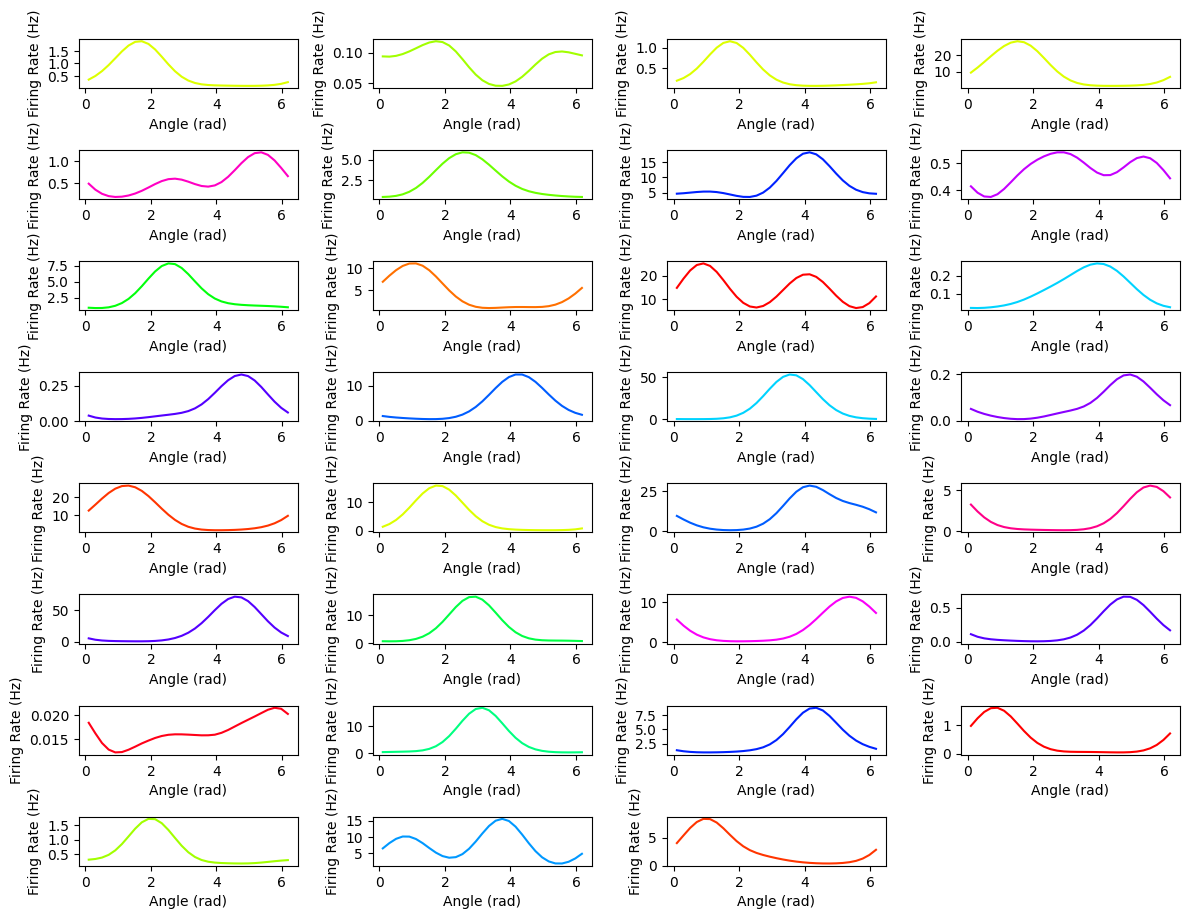

In [10]:
plt.figure(figsize = (12,9)) 
for i,n in enumerate(smoothcurves.columns):
     plt.subplot(8,4,i+1) #Plot the curves in 8 rows and 4 columns
     plt.plot(smoothcurves[n], color = color[i]) #Colour of the curves determined by preferred angle
     plt.tight_layout()
     plt.xlabel('Angle (rad)') #Angle in radian, on the X-axis
     plt.ylabel('Firing Rate (Hz)') #Firing rate in Hz, on the Y-axis

Awesome! 

***

### Decoding



Now that we have HD tuning curves, we can go one step further. Using only the population activity of ADn units, we can decode the direction the animal is looking in. We will then compare this to the real heead direction of the animal, and discover that population activity in the ADn indeed codes for HD. 

To decode the population activity, we will be using a Bayesian Decoder as implemented in Pynapple. Just a single line of code!




In [11]:
decoded, proba_feature = nap.decode_1d(tuning_curves = tuning_curves, #decode using the tuning curves we just computed
                                     group = spikes_adn,  #Use the spikes from ADn units                               
                                     ep = epochs['wake'], #Decode the population activity during wakefulness
                                     bin_size= 0.1, #in seconds
                                     feature = position['ry'], #Use the angles sampled by the animal to correct for biases in occupancy of a given angular bin
                                    )

#What does this look like?
decoded


Time (s)
8812.35     0.709392
8812.45     0.709392
8812.55     0.506708
8812.65     0.709392
8812.75     0.709392
              ...   
10770.85    5.776477
10770.95    5.776477
10771.05    5.979160
10771.15    5.979160
10771.25    5.776477
Length: 19590, dtype: float64

The variable *decoded* indicates the most probable angle in which the animal was looking. 
There is another variable, *proba_feature* that denotes the probability of a given angular bin at a given time point. We can look at it below:

In [12]:
proba_feature

,0.101342,0.304025,0.506708,0.709392,0.912075,1.114759,1.317442,1.520125,1.722809,1.925492,...,4.357693,4.560376,4.763060,4.965743,5.168427,5.371110,5.573793,5.776477,5.979160,6.181844
Time (s),,,,,,,,,,,,,,,,,,,,,
8812.35,0.000100,2.187955e-02,1.581491e-01,5.034708e-01,2.103416e-01,9.936589e-02,6.643882e-03,4.945117e-05,2.303023e-07,4.048951e-12,...,8.614071e-15,5.398692e-17,2.897171e-18,1.639439e-17,2.758645e-17,5.070812e-18,3.649023e-19,5.222400e-18,5.747784e-16,1.439321e-12
8812.45,0.000004,9.860187e-03,3.377970e-01,5.228581e-01,1.202371e-01,9.161438e-03,8.251980e-05,2.700228e-08,3.793783e-12,3.566629e-17,...,2.904850e-18,4.150435e-20,8.148756e-22,1.358105e-19,1.340967e-19,1.748095e-19,2.019765e-20,9.240654e-20,7.246108e-19,1.276281e-14
8812.55,0.008426,3.426559e-01,4.705857e-01,1.502019e-01,2.353085e-02,4.364309e-03,2.337925e-04,1.675847e-06,1.323388e-08,1.470867e-11,...,1.051978e-09,4.264471e-10,3.291401e-11,8.246261e-11,2.067806e-10,7.892441e-10,5.974161e-11,4.086647e-11,1.472776e-10,6.027254e-08
8812.65,0.000111,2.377172e-02,2.926252e-01,5.245652e-01,1.391217e-01,1.953009e-02,2.743659e-04,3.630791e-07,2.301256e-10,2.097335e-14,...,1.041001e-17,3.383357e-19,1.084823e-20,8.014338e-18,1.869468e-17,2.282822e-17,1.019573e-17,1.390911e-16,1.332192e-14,3.744284e-11
8812.75,0.000680,6.126122e-02,3.445759e-01,5.357666e-01,4.756890e-02,9.940560e-03,2.061010e-04,2.845606e-07,3.413567e-09,4.654424e-12,...,3.006307e-14,1.684389e-15,3.304284e-16,4.023545e-14,7.687605e-14,1.367327e-13,1.362010e-14,3.466501e-14,7.401004e-13,4.384530e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10770.85,0.000034,3.886312e-07,1.228797e-11,9.669791e-19,3.534991e-12,5.877834e-13,1.931741e-17,4.715551e-15,3.239064e-14,1.415470e-13,...,4.434358e-12,2.129058e-10,7.047352e-08,1.140581e-04,1.506911e-02,9.972120e-02,2.706241e-01,3.991009e-01,1.811069e-01,3.422883e-02
10770.95,0.000095,2.253317e-07,6.391497e-11,1.153336e-16,1.429730e-12,1.835837e-12,1.055101e-14,2.999092e-14,4.175044e-13,3.506233e-12,...,3.254143e-10,1.189748e-09,4.055138e-08,8.158243e-05,7.689682e-03,4.704161e-02,2.146309e-01,4.201867e-01,2.541676e-01,5.610691e-02
10771.05,0.000815,1.598716e-05,6.378624e-09,4.349740e-13,1.174119e-09,1.178650e-09,2.021659e-12,7.753815e-11,6.267979e-10,1.506501e-08,...,4.925662e-10,8.484470e-09,7.417596e-07,2.789592e-04,1.888344e-02,7.946867e-02,2.386599e-01,2.797980e-01,2.907765e-01,9.124426e-02


Each row of this pandas DataFrame is a time bin, and each column is an angular bin. The sum of all values in a row add up to 1. 

Now, let's plot the raster plot for a given period of time, and overlay the actual and decoded HD on the population activity.

/home/dhruv/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/home/dhruv/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/home/dhruv/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")


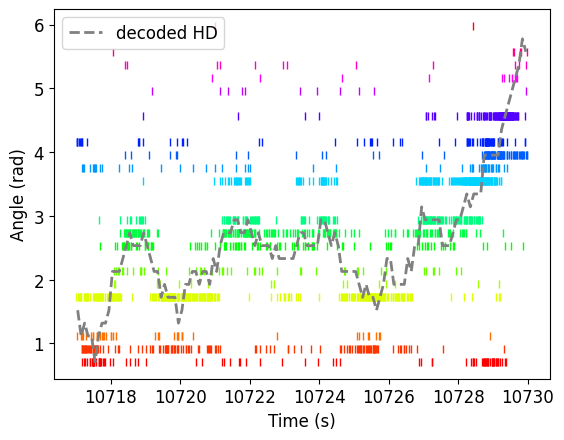

In [13]:
ep = nap.IntervalSet(start = 10717, end = 10730) #Select an arbitrary interval for plotting

plt.figure()
plt.rc('font', size = 12)
for i,n in enumerate(spikes_adn.keys()):
    plt.plot(spikes[n].restrict(ep).as_units('s').fillna(pref_ang[i]), '|',color = color[i]) #raster plot for each cell
plt.plot(decoded.restrict(ep),'--', color = 'grey', linewidth = 2, label = 'decoded HD') #decoded HD
plt.xlabel('Time (s)') #X-axis is time in seconds
plt.ylabel('Angle (rad)') #Y-axis is the angle in radian
plt.legend(loc = 'upper left')

From this plot, we can see that the decoder is able to estimate the head-direction based on the population activity in ADn. Amazing! 

What does the probability distribution in this example event look like? \
Ideally, the bins with the highest probability will correspond to the bins having the most spikes. Let's plot the probability matrix to visualize this.

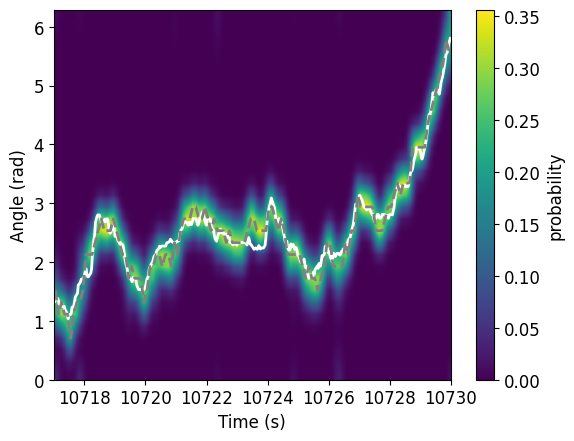

In [14]:
smoothed = scipy.ndimage.gaussian_filter(proba_feature, 1) #Smoothening the probability distribution

#Create a DataFrame with the smoothed distribution
p_feature = pd.DataFrame(index = proba_feature.index.values,columns = proba_feature.columns.values, data = smoothed)
p_feature = nap.TsdFrame(p_feature) #Make it a Pynapple TsdFrame

plt.figure()
plt.plot(position['ry'].restrict(ep),'w',linewidth = 2, label = 'actual HD', zorder = 1) #Actual HD, in white
plt.plot(decoded.restrict(ep),'--', color = 'grey', linewidth = 2, label = 'decoded HD', zorder = 1) #Decoded HD, in grey

#Plot the smoothed probability distribution
plt.imshow(p_feature.restrict(ep).T, aspect = 'auto',interpolation = 'bilinear', extent = [ep['start'].values[0],ep['end'].values[0],0,2*np.pi], origin = 'lower', cmap = 'viridis')

plt.xlabel('Time (s)') #X-axis is time in seconds
plt.ylabel('Angle (rad)') #Y-axis is the angle in radian
plt.colorbar(label = 'probability') 

From this probability distribution, we observe that the decoded HD very closely matches the actual HD. Therefore, the population activity in ADn is a reliable estimate of the heading direction of the animal. 

I hope this tutorial was helpful. If you have any questions, comments or suggestions, please feel free to reach out to the Pynapple Team!